<a href="https://colab.research.google.com/github/amrmoohamed/Crypto/blob/main/Final_Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Get Data**


## Using Binance Public Data API

In [ ]:
!git clone https://github.com/binance/binance-public-data
!mkdir data
!python3 /content/binance-public-data/python/download-kline.py --help

In [2]:
import sys
import os
import pandas as pd
from datetime import datetime
import urllib.request
import json

#!python3 /content/binance-public-data/python/download-kline.py -s ETHUSDT BTCUSDT BNBBUSD -i 1w -y 2020 -m 02 12 -c 0

def get_data(interval,start,end,symbols):
  string = 'python3 /content/binance-public-data/python/download-kline.py'+' -s '+ str(symbols) +' -i '+ str(interval) + ' -startDate ' + str(start) + ' -endDate ' + str(end) + ' -folder '+ str('/content/zip_data/')  #print(string)
  !eval "$string"

def get_all_symbols():
  response = urllib.request.urlopen("https://api.binance.com/api/v3/exchangeInfo").read()
  return list(map(lambda symbol: symbol['symbol'], json.loads(response)['symbols']))



In [3]:
available_currencies = get_all_symbols()
print(available_currencies)
print(len(available_currencies))

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

In [4]:
symbolstocash = [x for x in available_currencies if 'USD' in x]
print(symbolstocash)
print(len(symbolstocash))

['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'BCCUSDT', 'NEOUSDT', 'LTCUSDT', 'QTUMUSDT', 'ADAUSDT', 'XRPUSDT', 'BTCTUSD', 'TUSDBTC', 'ETHTUSD', 'TUSDETH', 'TUSDBNB', 'EOSUSDT', 'TUSDUSDT', 'IOTAUSDT', 'XLMUSDT', 'ONTUSDT', 'TRXUSDT', 'ETCUSDT', 'ICXUSDT', 'VENUSDT', 'NULSUSDT', 'VETUSDT', 'PAXUSDT', 'USDCBNB', 'BCHABCUSDT', 'BCHSVUSDT', 'BNBTUSD', 'XRPTUSD', 'EOSTUSD', 'XLMTUSD', 'BNBUSDC', 'BTCUSDC', 'ETHUSDC', 'XRPUSDC', 'EOSUSDC', 'XLMUSDC', 'USDCUSDT', 'ADATUSD', 'TRXTUSD', 'NEOTUSD', 'PAXTUSD', 'USDCTUSD', 'USDCPAX', 'LINKUSDT', 'LINKTUSD', 'LINKUSDC', 'WAVESUSDT', 'WAVESTUSD', 'WAVESUSDC', 'BCHABCTUSD', 'BCHABCUSDC', 'BCHSVTUSD', 'BCHSVUSDC', 'LTCTUSD', 'LTCUSDC', 'TRXUSDC', 'BTTUSDT', 'BNBUSDS', 'BTCUSDS', 'USDSUSDT', 'USDSPAX', 'USDSTUSD', 'USDSUSDC', 'BTTTUSD', 'BTTUSDC', 'ONGUSDT', 'HOTUSDT', 'ZILUSDT', 'ZRXUSDT', 'FETUSDT', 'BATUSDT', 'XMRUSDT', 'ZECUSDT', 'ZECTUSD', 'ZECUSDC', 'IOSTUSDT', 'CELRUSDT', 'ADAUSDC', 'NEOUSDC', 'DASHUSDT', 'NANOUSDT', 'OMGUSDT', 'THETAUSDT', 'ENJUSDT', 'MI

In [1]:
#symbols = symbolstocash[:21]
interval = '4h'
start_date = '2018-08-10'
end_date = '2021-08-10'

In [ ]:
columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']

def download_data(symbols,interval,start,end):
  for i in symbols:
    build_directory = 'mkdir' + '/content/data/{}'.format(i)
    !eval '$build_directory'
    df = pd.DataFrame(columns = ['date','open','high', 'low', 'close', 'volume','num_trades'])
    get_data(interval,start,end,i)
    #monthly data
    path = '/content/zip_data/data/spot/monthly/klines/{}/{}/{}_{}/'.format(i,interval,start,end)
    for filename in os.listdir(path):
      path2 = path + str(filename)
      intodirectory = '/content/data/{}'.format(i)
      extract = 'unzip '+ path2 + ' -d {}'.format(intodirectory)
      !eval '$extract'
      file_to_read = intodirectory + str(filename) + '.csv'
      d_of_file = pd.read_csv(path2,names= columns)
      d_of_file['date']= d_of_file['open_time'].apply(lambda x : datetime.fromtimestamp(x/1000.0))
      d_of_file = d_of_file[['date','open','high', 'low', 'close', 'volume','num_trades']]
      df = df.append(d_of_file)
    #daily data
    path = '/content/zip_data/data/spot/daily/klines/{}/{}/{}_{}/'.format(i,interval,start,end)
    for filename in os.listdir(path):
      path2 = path + str(filename)
      intodirectory = '/content/data/{}'.format(i)
      extract = 'unzip '+ path2 + ' -d {}'.format(intodirectory)
      !eval '$extract'
      file_to_read = intodirectory + str(filename) + '.csv'
      d_of_file = pd.read_csv(path2,names= columns)
      d_of_file['date']= d_of_file['open_time'].apply(lambda x : datetime.fromtimestamp(x/1000.0))
      d_of_file = d_of_file[['date','open','high', 'low', 'close', 'volume','num_trades']]
      df = df.append(d_of_file)

    df.drop_duplicates(subset=['date'])
    df['ticker'] = i
    df.dropna(axis=0,inplace=True)
    df.to_csv('{}.csv'.format(i),index=False)


In [ ]:
download_data(symbols,interval,start,end)

Streaming output truncated to the last 5000 lines.
[##################################################]
File Download: /content/zip_data/data/spot/monthly/klines/BTCUSDT/4h/2018-08-10_2021-08-10/BTCUSDT-4h-2020-10.zip
[##################################################]
File Download: /content/zip_data/data/spot/monthly/klines/BTCUSDT/4h/2018-08-10_2021-08-10/BTCUSDT-4h-2020-11.zip
[##################################################]
File Download: /content/zip_data/data/spot/monthly/klines/BTCUSDT/4h/2018-08-10_2021-08-10/BTCUSDT-4h-2020-12.zip
[##################################################]
File Download: /content/zip_data/data/spot/monthly/klines/BTCUSDT/4h/2018-08-10_2021-08-10/BTCUSDT-4h-2021-01.zip
[##################################################]
File Download: /content/zip_data/data/spot/monthly/klines/BTCUSDT/4h/2018-08-10_2021-08-10/BTCUSDT-4h-2021-02.zip
[##################################################]
File Download: /content/zip_data/data/spot/monthly/klines/BTC

In [ ]:
BTC = pd.read_csv('/content/BTCUSDT.csv')
rows,columns = BTC.shape
def check_list(symbols):
  for s in symbols:
    df = pd.read_csv('{}.csv'.format(s))
    row,column = df.shape
    if row != rows:
      symbols.remove(s)
  return symbols

In [ ]:
symbolss = check_list(symbols)
len(symbolss)

18

In [ ]:
def merge_data(symbols):
  data_frame = pd.DataFrame(columns = ['date','open','high', 'low', 'close', 'volume','num_trades','ticker'])
  for s in symbols:
    df = pd.read_csv('{}.csv'.format(s))
    data_frame = data_frame.append(df)

  data_frame = data_frame.sort_values(['date','ticker'],ascending=True).reset_index(drop=True) #,'ticker']
  return data_frame

In [ ]:
data = merge_data(symbols)
data.head(5)

date        open  ...  num_trades   ticker
0  2018-09-01 00:00:00     0.10158  ...        5947  ADAUSDT
1  2018-09-01 00:00:00    10.98970  ...        5826  BNBUSDT
2  2018-09-01 00:00:00  7011.21000  ...       28441  BTCUSDT
3  2018-09-01 00:00:00     6.40850  ...       16047  EOSUSDT
4  2018-09-01 00:00:00    12.73980  ...        3406  ETCUSDT

[5 rows x 8 columns]

In [ ]:
data.tail()

date     open  ...  num_trades    ticker
117715  2021-08-10 20:00:00  0.07397  ...       26206   TRXUSDT
117716  2021-08-10 20:00:00  0.99970  ...         813  TUSDUSDT
117717  2021-08-10 20:00:00  0.10580  ...       26123   VETUSDT
117718  2021-08-10 20:00:00  0.30715  ...       31992   XLMUSDT
117719  2021-08-10 20:00:00  0.83590  ...      117527   XRPUSDT

[5 rows x 8 columns]

In [ ]:
data.to_csv('all_data.csv',index=False)

In [ ]:
for s in symbolss:
  copy = 'cp ' + '{}.csv'.format(s) + ' /content/drive/MyDrive/work/Trading/Crypto/Data/3_years_2018'
  !eval '$copy'

In [ ]:
!cp /content/all_data.csv /content/drive/MyDrive/work/Trading/Crypto/Data/3_years_2018

## Using Historic_crypto Library

In [ ]:
!pip install Historic-Crypto
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import LiveCryptoData
import pandas as pd
from math import floor

In [ ]:
from Historic_Crypto import Cryptocurrencies

#pairs = Cryptocurrencies().find_crypto_pairs()
data = Cryptocurrencies(coin_search = 'USD', extended_output=False).find_crypto_pairs()

pairs = data['id']
symbolstocash = [x for x in pairs if 'USD' in x]
print(len(symbolstocash))
symbolstocash

In [ ]:
from Historic_Crypto import HistoricalData

ticker = 'ETH-USD'
granularity = 86400                 # granularity in seconds (60 "1 minute", 300 "5 minutes", 900 "15 minutes", 3600 "1 hour", 21600 "6 hours", 86400 "daily") (int).
start_date = '2019-08-21-00-00'   # format YYYY-MM-DD-HH-MM (str)
#end_date =                        #optional

new = HistoricalData(ticker,granularity,start_date).retrieve_data()
new.head()

In [90]:
from Historic_Crypto import HistoricalData

for s in symbolstocash:
  ticker = s
  granularity = 21600                 
  start_date = '2018-01-01-00-00'   
  new = HistoricalData(ticker,granularity,start_date).retrieve_data()
  new.to_csv('{}.csv'.format(s),index=False)


Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API...
Ticker 'CVC-USDC' found at the CoinBase Pro API, continuing to extraction...
Data for chunk 0 of 17 extracted
CoinBase Pro API did not have any data available for 'CVC-USDC' beginning at 2018-01-01-00-00. Trying a later date:'2018-01-01T00:00:00'
Data for chunk 1 of 17 extracted
CoinBase Pro API did not have any data available for 'CVC-USDC' beginning at 2018-01-01-00-00. Trying a later date:'2018-03-17T00:00:00'
Data for chunk 2 of 17 extracted
CoinBase Pro API did not have any data available for 'CVC-USDC' beginning at 2018-01-01-00-00. Trying a later date:'2018-05-31T00:00:00'
Data for chunk 3 of 17 extracted
CoinBase Pro API did not have any data available for 'CVC-USDC' beginning at 2018-01-01-00-00. Trying a later date:'2018-08-14T00:00:00'
Data for chunk 4 of 17 extracted
Data for chunk 5 of 17 extract

In [91]:
!mkdir /content/drive/MyDrive/work/Trading/Crypto/Data/6h_2018
for s in symbolstocash:
  copy = 'cp ' + '{}.csv'.format(s) + ' /content/drive/MyDrive/work/Trading/Crypto/Data/6h_2018'
  !eval '$copy'

In [64]:
!cp -a /content/drive/MyDrive/work/Trading/Crypto/Data/1h_2018 /content

In [ ]:
BTC = pd.read_csv('/content/CGLD-USD.csv',index=Time)
rows,columns = BTC.shape
BTC.head()
#print(rows,columns)

In [93]:
def check_list(symbols):
  for s in symbols:
    df = pd.read_csv('/content/1h_2018/{}.csv'.format(s))
    row,column = df.shape
    if row != rows:
      symbols.remove(s)
  return symbols

In [88]:
A = pd.read_csv('/content/1h_2018/BAL-USD.csv')
rows,columns = A.shape
print(rows,columns)

7730 5


In [69]:
symbolstocash.remove('COTI-USD')

In [82]:
symbolstocash = check_list(symbolstocash)

In [83]:
symbolstocash

['BTC-USD']

In [ ]:
def merge_data(symbols):
  data_frame = pd.DataFrame(columns = ['date','open','high', 'low', 'close', 'volume','num_trades','ticker'])
  for s in symbols:
    df = pd.read_csv('{}.csv'.format(s))
    data_frame = data_frame.append(df)

  data_frame = data_frame.sort_values(['date','ticker'],ascending=True).reset_index(drop=True) #,'ticker']
  data_frame.to_csv('all_data.csv'index=False)
  return data_frame

#merge_data(symbolstocash)

In [2]:
def get_index_data(dataframe):
  data_frame = pd.DataFrame(columns = ['date','open','high', 'low', 'close', 'volume','num_trades'])
  df = pd.read_csv(dataframe,index_col='date')
  for d in df.index.unique():
    temp = df.loc[d]
    open = sum(temp.open)/len(temp)
    close = sum(temp.close)/len(temp)
    high = sum(temp.high)/len(temp)
    low = sum(temp.low)/len(temp)
    volume = sum(temp.volume)/len(temp)
    numoftrades = sum(temp.num_trades)/len(temp)
    current_index_value = pd.DataFrame([[d,open,high,low,close,volume,numoftrades]],columns = ['date','open','high', 'low', 'close', 'volume','num_trades'])
    data_frame = data_frame.append(current_index_value)
  data_frame.reset_index(drop=True,inplace=True)
  data_frame.to_csv('index.csv',index=False)
  return data_frame


In [10]:
indexxx = get_index_data('/content/all_data.csv')
indexxx.head()

date        open  ...        volume    num_trades
0  2018-09-01 00:00:00  412.068056  ...  1.385674e+07   6923.777778
1  2018-09-01 04:00:00  415.778817  ...  9.396818e+06   5829.722222
2  2018-09-01 08:00:00  414.517724  ...  1.269951e+07   7214.444444
3  2018-09-01 12:00:00  415.825009  ...  2.422784e+07  10909.833333
4  2018-09-01 16:00:00  421.920224  ...  1.746180e+07   9509.166667

[5 rows x 7 columns]

#**installing & Importing**

In [ ]:
!sudo apt-get update && sudo apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx
!git clone https://github.com/AI4Finance-LLC/FinRL-Library.git
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
import datetime


from finrl.apps import config
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
import sys
sys.path.append("../FinRL-Library")

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [5]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

#**Feautre Pipeline**

In [6]:
!cp /content/drive/MyDrive/work/Trading/Crypto/Data/3_years_2018/all_data.csv /content 

In [7]:
data = pd.read_csv('/content/all_data.csv')
data.rename(columns={'ticker': 'tic'}, inplace=True)
data.head(2)

date      open      high  ...       volume  num_trades      tic
0  2018-09-01 00:00:00   0.10158   0.10569  ...  26872125.80        5947  ADAUSDT
1  2018-09-01 00:00:00  10.98970  11.42230  ...    223266.61        5826  BNBUSDT

[2 rows x 8 columns]

In [8]:
data.shape

(117720, 8)

In [9]:
data = data.drop_duplicates()
data.shape

(115992, 8)

In [11]:
#tech_indicator_list=config.TECHNICAL_INDICATORS_LIST
## you can add more technical indicators
## visit https://github.com/jealous/stockstats for different names

tech_indicator_list=config.TECHNICAL_INDICATORS_LIST

In [12]:
tech_indicator_list.remove('cci_30')

In [13]:
print(tech_indicator_list)

['macd', 'rsi_30', 'dx_30']


In [14]:
tech_indicator_list = tech_indicator_list +['dma','trix','open_30_sma','open_60_sma']

In [15]:
print(tech_indicator_list)

['macd', 'rsi_30', 'dx_30', 'dma', 'trix', 'open_30_sma', 'open_60_sma']


In [16]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicator_list,
                    use_turbulence=True,
                    user_defined_feature = False)

data = fe.preprocess_data(data)

Successfully added technical indicators
Successfully added turbulence index


In [17]:
# add covariance matrix as states
data=data.sort_values(['date','tic'],ignore_index=True)
data.index = data.date.factorize()[0]

cov_list = []
# look back is 70 days
lookback= 70
for i in range(lookback,len(data.index.unique())):
  data_lookback = data.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  covs = return_lookback.cov().values 
  cov_list.append(covs)
  
df_cov = pd.DataFrame({'date':data.date.unique()[lookback:],'cov_list':cov_list})
data = data.merge(df_cov, on='date')
data = data.sort_values(['date','tic']).reset_index(drop=True)

In [18]:
data.shape

(114732, 17)

In [19]:
data.head()

date  ...                                           cov_list
0  2018-09-12 16:00:00  ...  [[0.000593534761056743, 0.0003197357021476579,...
1  2018-09-12 16:00:00  ...  [[0.000593534761056743, 0.0003197357021476579,...
2  2018-09-12 16:00:00  ...  [[0.000593534761056743, 0.0003197357021476579,...
3  2018-09-12 16:00:00  ...  [[0.000593534761056743, 0.0003197357021476579,...
4  2018-09-12 16:00:00  ...  [[0.000593534761056743, 0.0003197357021476579,...

[5 rows x 17 columns]

#**Design Environment**

In [20]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then 
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step
        

    """
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,)) 
        # Shape = (34, 30)
        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold        
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]

        
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()
            
            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")
            
            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:
            #  norm_actions = actions
            weights = self.softmax_normalization(actions) 
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])            
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value 
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False 
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]] 
        return self.state
    
    def render(self, mode='human'):
        return self.state
        
    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output

    
    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']
        
        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

##**ENV**

In [21]:
#when add Covariance Matrix
trainsize = 0.7

start_train = str(start_date)

Interval = pd.to_datetime(end_date) - pd.to_datetime(start_date)
train_Interval = trainsize * Interval

end_train = pd.to_datetime(start_date) + datetime.timedelta(days= train_Interval.days)
end_train = str(end_train)
end_trade = pd.to_datetime(end_date)
end_trade = str(end_trade)

In [22]:
train = data_split(data, start = start_train, end = end_train)
trade = data_split(data, start = end_train, end = end_trade)

##**Environment for Portfolio Allocation**

In [23]:
stock_dimension = len(train.tic.unique())
state_space = stock_dimension
#state_space = 1 + 2*stock_dimension + len(tech_indicator_list)*stock_dimension
#state_space = 1 + 2*(stock_dimension+2) + (len(tech_indicator_list)-2)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 18, State Space: 18


In [24]:
env_kwargs = {
    "hmax": 10000, 
    "initial_amount": 1000000,
    "transaction_cost_pct": 0.001, 
    #"buy_cost_pct": 0.001,
    #"sell_cost_pct": 0.001,
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": tech_indicator_list, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
}
e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)

In [25]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [26]:
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

In [27]:
env_trade, _ = e_train_gym.get_sb_env()
print(type(env_trade))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


#**DRL Algorithms**

In [28]:
# initialize
agent = DRLAgent(env = env_train)

##**A2C**

###**Train**

In [29]:
A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)
trained_a2c = agent.train_model(model=model_a2c, 
                                tb_log_name='a2c',
                                total_timesteps=50000)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cuda device
Logging to tensorboard_log/a2c/a2c_1
------------------------------------
| time/                 |          |
|    fps                | 116      |
|    iterations         | 100      |
|    time_elapsed       | 4        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -25.5    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0002   |
|    n_updates          | 99       |
|    policy_loss        | 4.52e+07 |
|    std                | 0.999    |
|    value_loss         | 3.8e+12  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 148      |
|    iterations         | 200      |
|    time_elapsed       | 6        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -25.5    |
|    explained_variance | 0        

###**Trade**

In [30]:
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_a2c,environment= e_trade_gym)

begin_total_asset:1000000
end_total_asset:5601834.795091572
Sharpe:  0.7765708585831348
hit end!


In [31]:
df_daily_return.head(2)

date  daily_return
0  2020-09-15 00:00:00      0.000000
1  2020-09-15 04:00:00     -0.001482

In [32]:
df_actions.head(2)

ADAUSDT   BNBUSDT   BTCUSDT  ...   VETUSDT   XLMUSDT   XRPUSDT
date                                               ...                              
2020-09-15 00:00:00  0.055556  0.055556  0.055556  ...  0.055556  0.055556  0.055556
2020-09-15 04:00:00  0.061315  0.103985  0.095459  ...  0.038254  0.038254  0.038254

[2 rows x 18 columns]

###**BackTest**

In [33]:
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from finrl.plot import backtest_plot,convert_daily_return_to_pyfolio_ts,get_daily_return
from pyfolio import timeseries
import pyfolio

In [34]:
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func(returns=DRL_strat, 
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============A2C Strategy Stats===========")
perf_stats_all

==============A2C Strategy Stats===========


Annual return          0.246039
Cumulative returns     4.601835
Annual volatility      0.374449
Sharpe ratio           0.776571
Calmar ratio           0.373681
Stability              0.775859
Max drawdown          -0.658419
Omega ratio            1.149340
Sortino ratio          1.066731
Skew                  -0.550922
Kurtosis               3.792271
Tail ratio             0.934834
Daily value at risk   -0.046022
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [35]:
#split_date = datetime.date(end_train)
#baseline_df = indexxx[(pd.to_datetime(indexxx["date"]) > split_date)]

==============Compare to 	Virtual Index===========


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


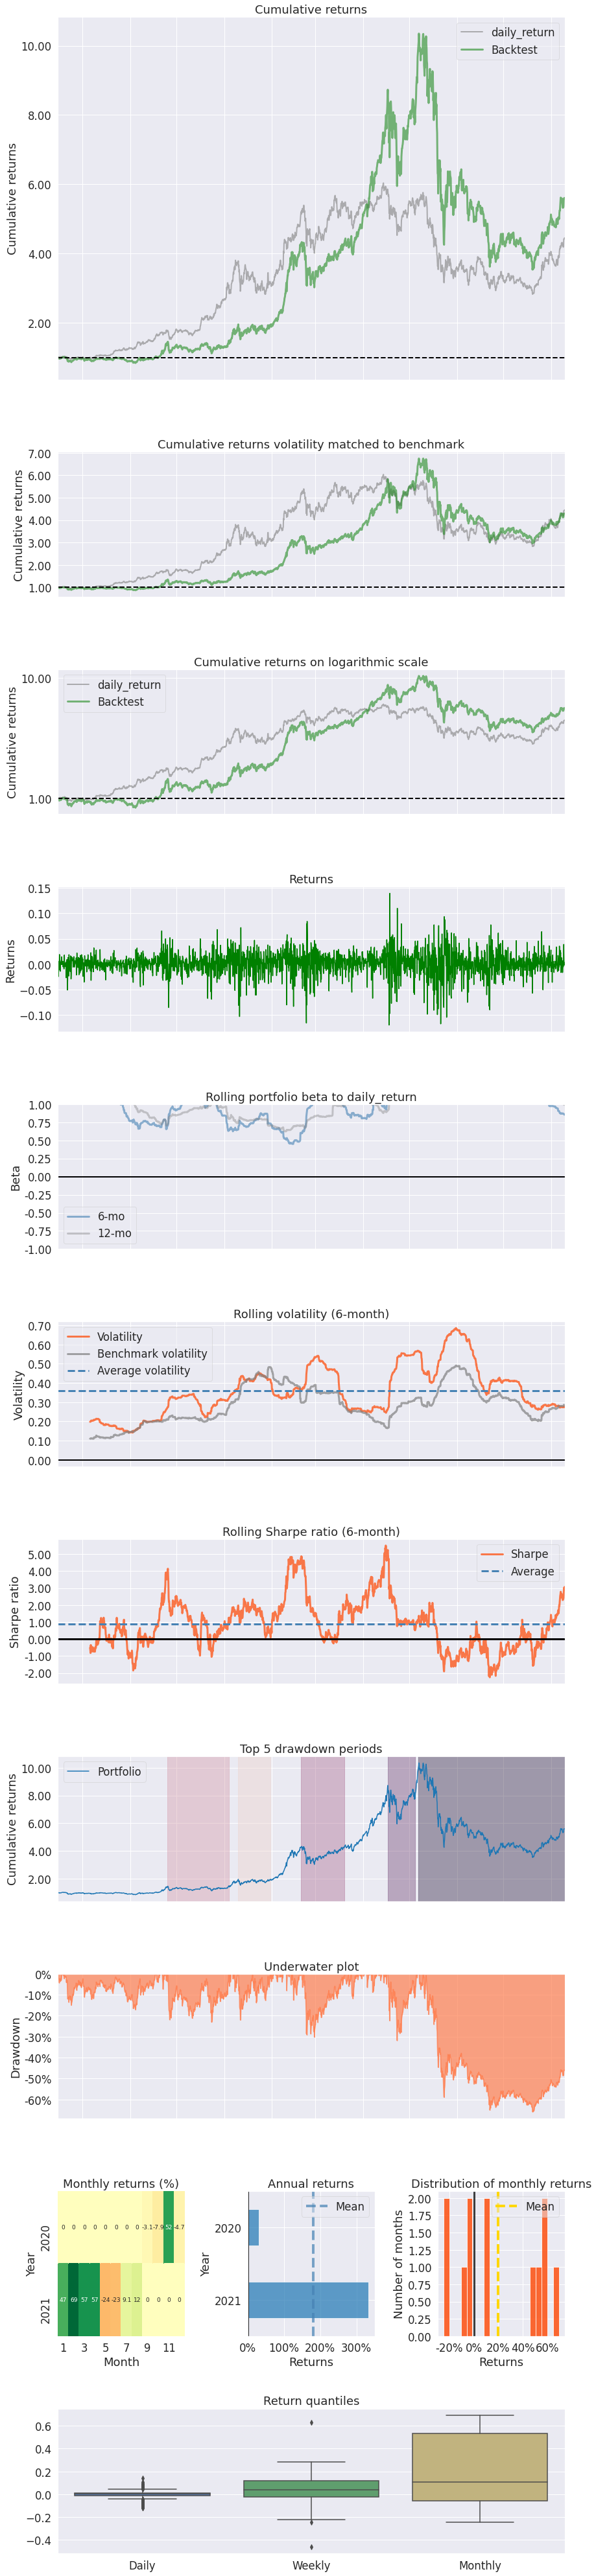

In [36]:
baseline_df = indexxx.loc[indexxx.date >= end_train]
baseline_df = baseline_df.loc[baseline_df.date < end_trade]

baseline_returns = get_daily_return(baseline_df, value_col_name="close")

%matplotlib inline
print("==============Compare to 	Virtual Index===========")
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat[1:],
                                       benchmark_rets=baseline_returns[1:], set_context=True)

##**DDPG**

###**Train**

In [37]:
DDPG_PARAMS = {"batch_size": 64, "buffer_size": 500000, "learning_rate": 0.0001}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=30000)

{'batch_size': 64, 'buffer_size': 500000, 'learning_rate': 0.0001}
Using cuda device
Logging to tensorboard_log/ddpg/ddpg_1
begin_total_asset:1000000
end_total_asset:1227411.1864360203
Sharpe:  0.1763034286739244
begin_total_asset:1000000
end_total_asset:1226917.3055587707
Sharpe:  0.17580327670804635
begin_total_asset:1000000
end_total_asset:1226917.3055587707
Sharpe:  0.17580327670804635
begin_total_asset:1000000
end_total_asset:1226917.3055587707
Sharpe:  0.17580327670804635
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 97        |
|    time_elapsed    | 179       |
|    total timesteps | 17576     |
| train/             |           |
|    actor_loss      | -3.36e+07 |
|    critic_loss     | 4.61e+11  |
|    learning_rate   | 0.0001    |
|    n_updates       | 13182     |
----------------------------------
begin_total_asset:1000000
end_total_asset:1226917.3055587707
Sharpe:  0.17580327670804635
begin_t

###**Trade**

In [38]:
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_ddpg,environment= e_trade_gym)

begin_total_asset:1000000
end_total_asset:4979057.854457144
Sharpe:  0.743926536106026
hit end!


###**BackTest**

In [39]:
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func(returns=DRL_strat, 
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============DDPG Strategy Stats===========")
perf_stats_all

==============DDPG Strategy Stats===========


Annual return          0.227432
Cumulative returns     3.979058
Annual volatility      0.366762
Sharpe ratio           0.743927
Calmar ratio           0.344263
Stability              0.777786
Max drawdown          -0.660635
Omega ratio            1.142503
Sortino ratio          1.021504
Skew                  -0.555750
Kurtosis               3.567332
Tail ratio             0.921285
Daily value at risk   -0.045125
Alpha                  0.000000
Beta                   1.000000
dtype: float64

==============Compare to 	Virtual Index===========


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


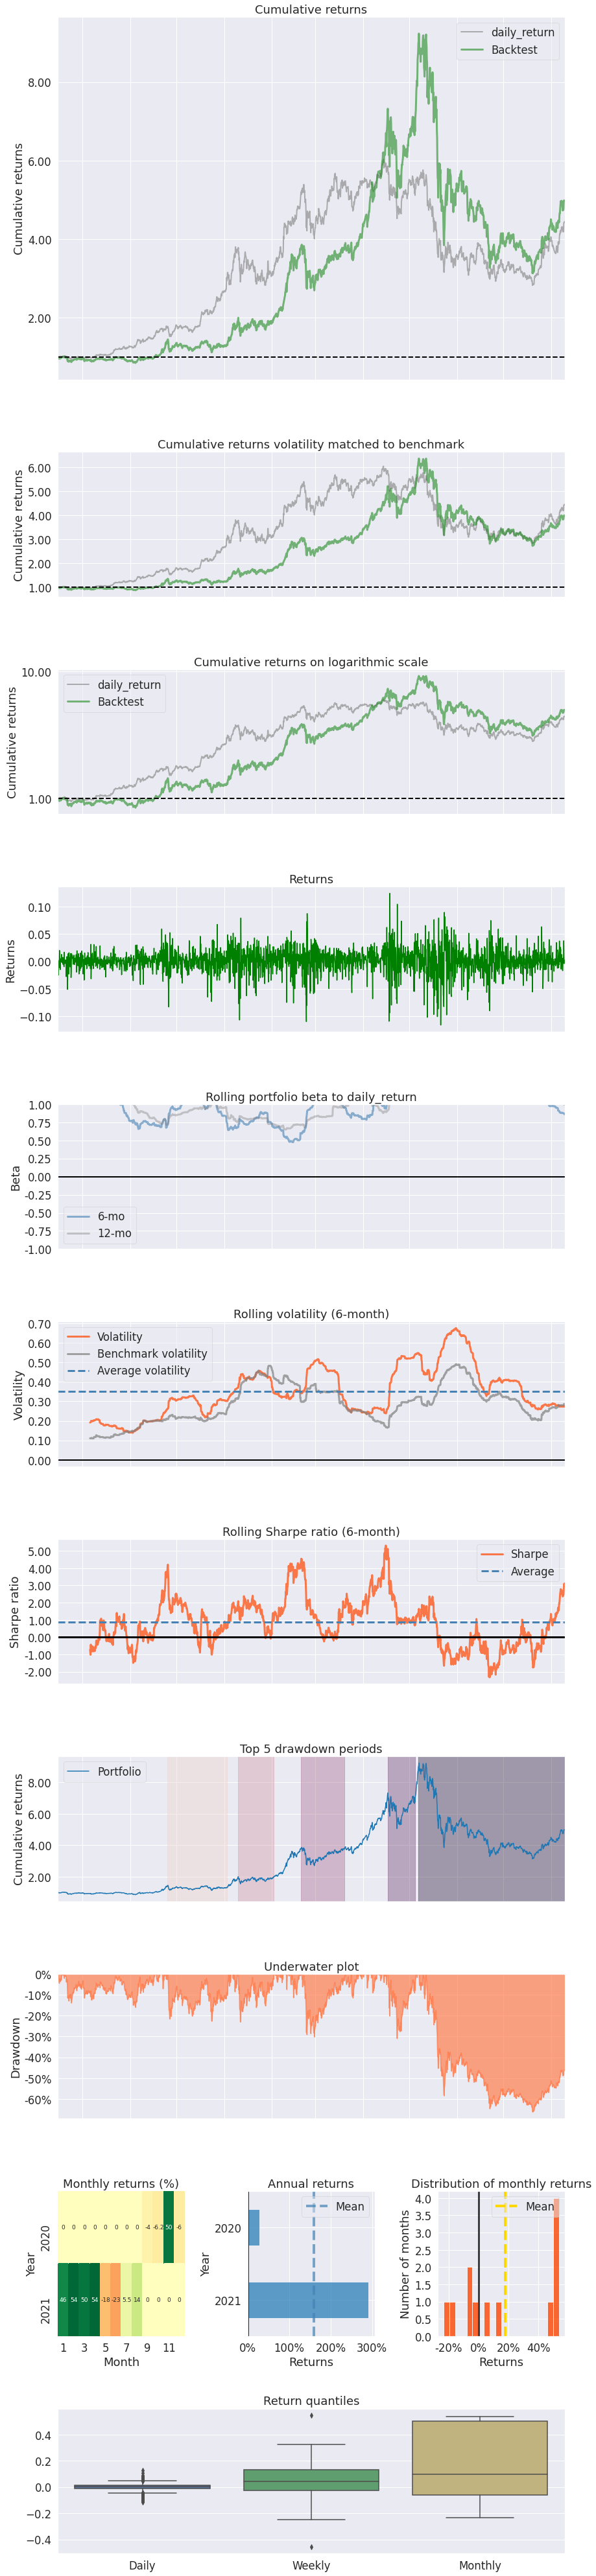

In [40]:
%matplotlib inline
print("==============Compare to 	Virtual Index===========")
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat[1:],
                                       benchmark_rets=baseline_returns[1:], set_context=True)

##**PPO**

###**Train**

In [41]:
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=80000)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cuda device
Logging to tensorboard_log/ppo/ppo_1
-----------------------------
| time/              |      |
|    fps             | 307  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 2048 |
-----------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 283            |
|    iterations           | 2              |
|    time_elapsed         | 14             |
|    total_timesteps      | 4096           |
| train/                  |                |
|    approx_kl            | -1.0360964e-08 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -25.5          |
|    explained_variance   | 0              |
|    learning_rate        | 0.0001         |
|    loss                 | 1.33e+14       |
|    n_updates          

###**Trade**

In [42]:
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_ppo,environment= e_trade_gym)

begin_total_asset:1000000
end_total_asset:4765819.240903542
Sharpe:  0.7217725094589997
hit end!


###**BackTest**

In [43]:
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func(returns=DRL_strat, 
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============PPO Strategy Stats===========")
perf_stats_all

==============PPO Strategy Stats===========


Annual return          0.220593
Cumulative returns     3.765819
Annual volatility      0.374160
Sharpe ratio           0.721773
Calmar ratio           0.333109
Stability              0.744787
Max drawdown          -0.662223
Omega ratio            1.138084
Sortino ratio          0.987854
Skew                  -0.580599
Kurtosis               3.435825
Tail ratio             0.903007
Daily value at risk   -0.046068
Alpha                  0.000000
Beta                   1.000000
dtype: float64

==============Compare to 	Virtual Index===========


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


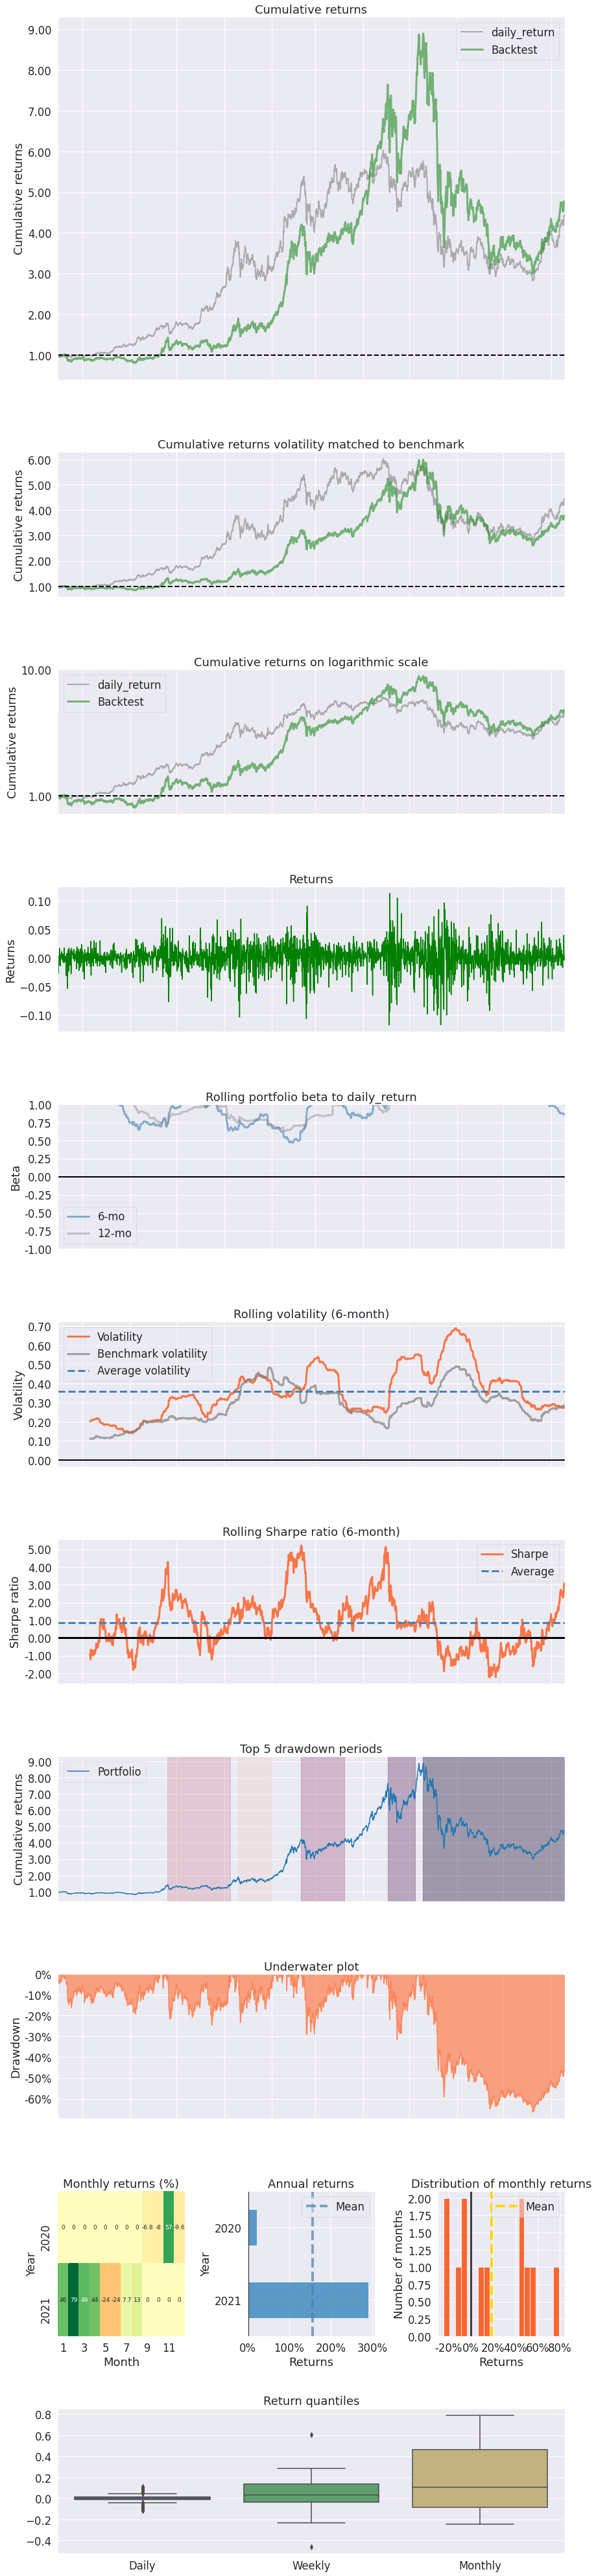

In [44]:
%matplotlib inline
print("==============Compare to 	Virtual Index===========")
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat[1:],
                                       benchmark_rets=baseline_returns[1:], set_context=True)

##**TD3**

###**Train**

In [45]:
TD3_PARAMS = {"batch_size": 128, 
              "buffer_size": 1000000, 
              "learning_rate": 0.0003}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0003}
Using cuda device
Logging to tensorboard_log/td3/td3_1
begin_total_asset:1000000
end_total_asset:1289292.790560004
Sharpe:  0.19196993049064662
begin_total_asset:1000000
end_total_asset:1290861.567379659
Sharpe:  0.19261679292792785
begin_total_asset:1000000
end_total_asset:1290861.567379659
Sharpe:  0.19261679292792785
begin_total_asset:1000000
end_total_asset:1290861.567379659
Sharpe:  0.19261679292792785
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 104       |
|    time_elapsed    | 168       |
|    total timesteps | 17576     |
| train/             |           |
|    actor_loss      | -1.96e+07 |
|    critic_loss     | 4.82e+11  |
|    learning_rate   | 0.0003    |
|    n_updates       | 13182     |
----------------------------------
begin_total_asset:1000000
end_total_asset:1290861.567379659
Sharpe:  0.19261679292792785
begin_total

###**Trade**

In [46]:
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_td3,environment= e_trade_gym)

begin_total_asset:1000000
end_total_asset:5490125.651151789
Sharpe:  0.7504837594180164
hit end!


###**BackTest**

In [47]:
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func(returns=DRL_strat, 
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============TD3 Strategy Stats===========")
perf_stats_all

==============TD3 Strategy Stats===========


Annual return          0.242839
Cumulative returns     4.490126
Annual volatility      0.394333
Sharpe ratio           0.750484
Calmar ratio           0.358091
Stability              0.761994
Max drawdown          -0.678149
Omega ratio            1.143076
Sortino ratio          1.031992
Skew                  -0.532504
Kurtosis               3.453617
Tail ratio             0.950961
Daily value at risk   -0.048507
Alpha                  0.000000
Beta                   1.000000
dtype: float64

==============Compare to Virtual Index===========


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


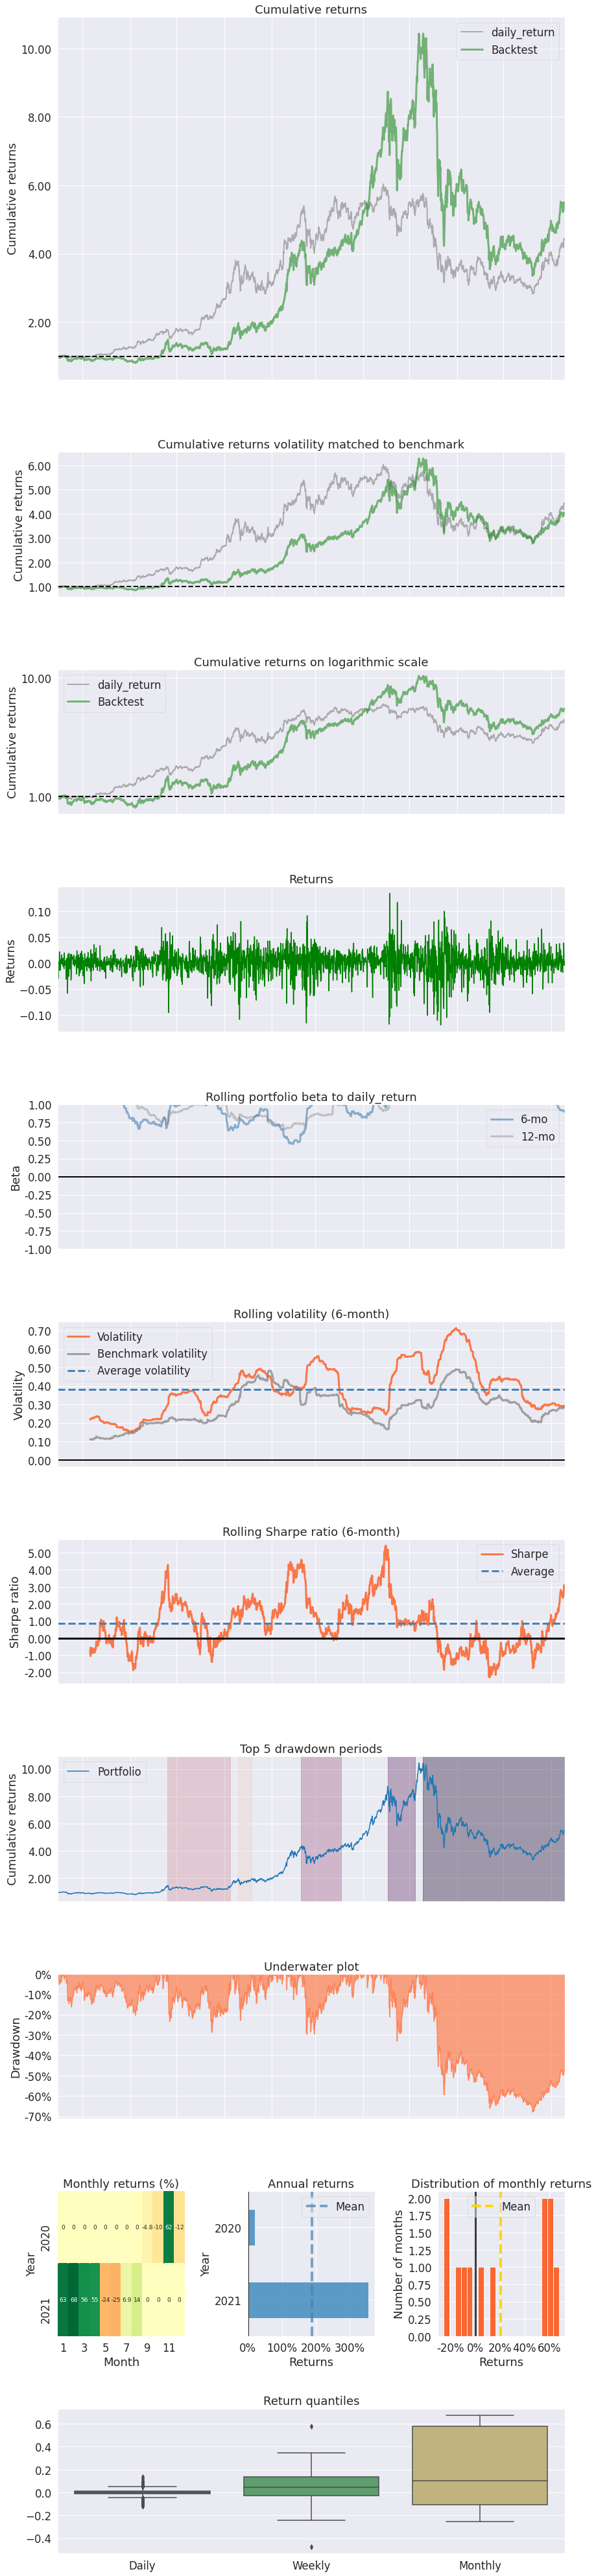

In [48]:
%matplotlib inline
print("==============Compare to Virtual Index===========")
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat[1:],
                                       benchmark_rets=baseline_returns[1:], set_context=True)

##**SAC**

###**Train**

In [49]:
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=30000)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device
Logging to tensorboard_log/sac/sac_1
begin_total_asset:1000000
end_total_asset:1401461.5646149567
Sharpe:  0.20525953956940907
begin_total_asset:1000000
end_total_asset:1409233.1298459414
Sharpe:  0.20641910729503163
begin_total_asset:1000000
end_total_asset:1409233.1145480599
Sharpe:  0.20641910482700715
begin_total_asset:1000000
end_total_asset:1409233.1145480599
Sharpe:  0.20641910482700715
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 50        |
|    time_elapsed    | 348       |
|    total timesteps | 17576     |
| train/             |           |
|    actor_loss      | -4.92e+07 |
|    critic_loss     | 2.64e+11  |
|    ent_coef        | 0.566     |
|    ent_coef_loss   | 147       |
|    learning_rate   | 0.0001    |
|    n_updates       | 17475     |
--------------

###**Trade**

In [50]:
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_sac,environment= e_trade_gym)

begin_total_asset:1000000
end_total_asset:5155582.2739658
Sharpe:  0.7703803819952796
hit end!


###**BackTest**

In [51]:
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats 
perf_stats_all = perf_func(returns=DRL_strat, 
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============SAC Strategy Stats===========")
perf_stats_all

==============SAC Strategy Stats===========


Annual return          0.232903
Cumulative returns     4.155582
Annual volatility      0.353881
Sharpe ratio           0.770380
Calmar ratio           0.372713
Stability              0.776320
Max drawdown          -0.624887
Omega ratio            1.148121
Sortino ratio          1.054898
Skew                  -0.593341
Kurtosis               3.577366
Tail ratio             0.920813
Daily value at risk   -0.043503
Alpha                  0.000000
Beta                   1.000000
dtype: float64

==============Compare to Virtual Index===========


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


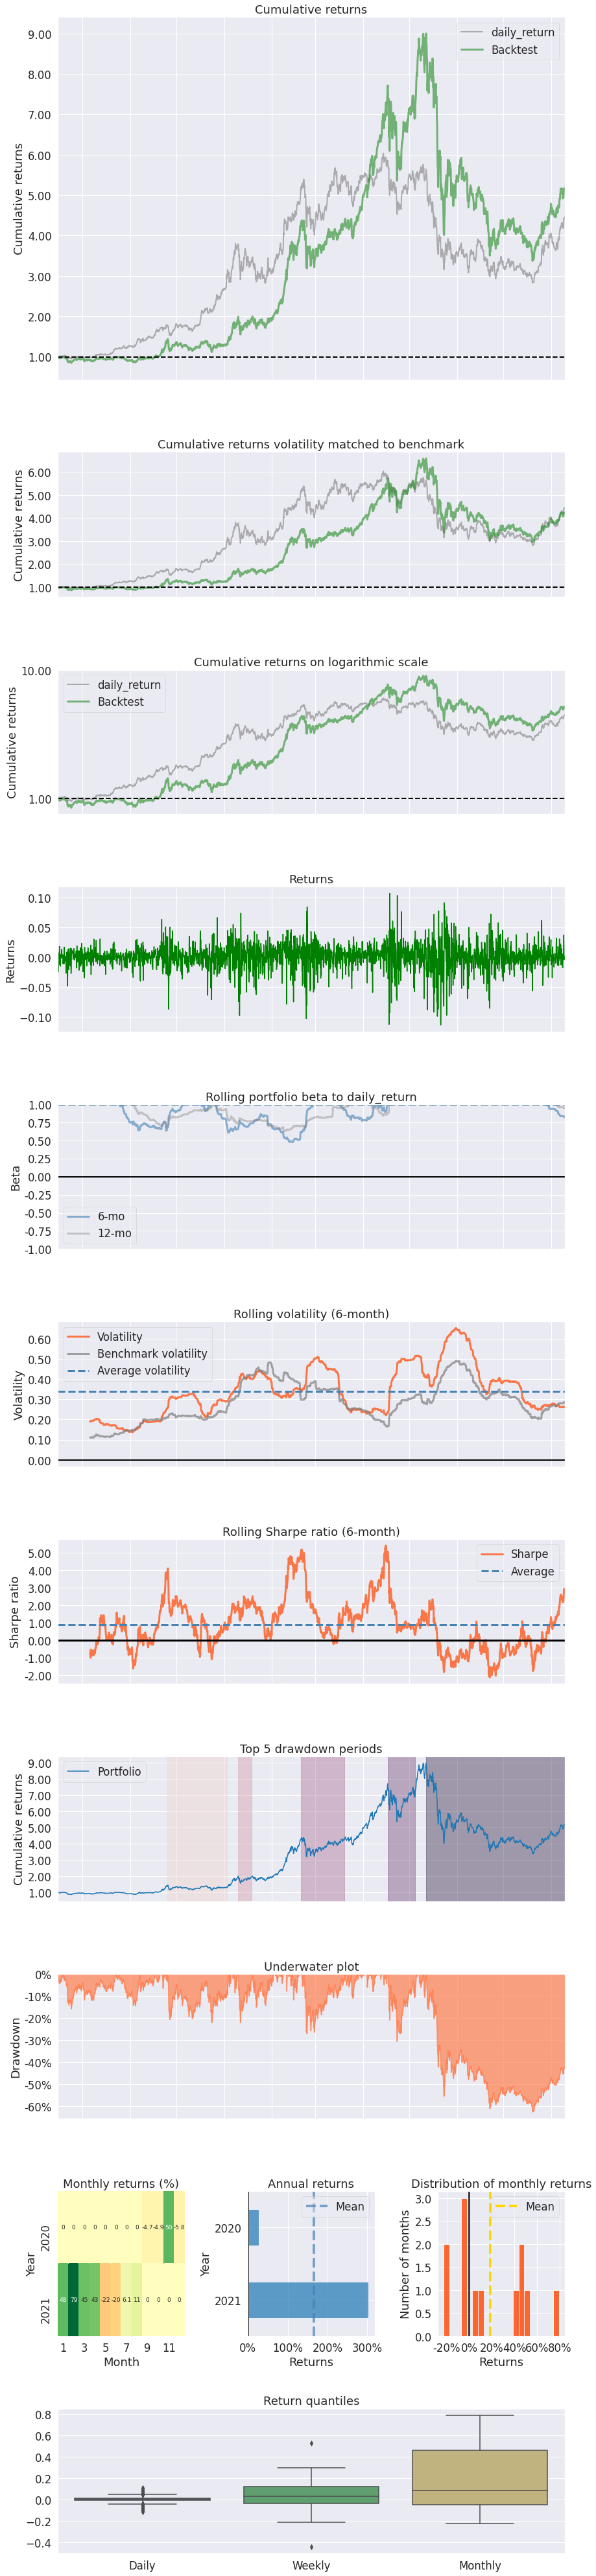

In [52]:
%matplotlib inline
print("==============Compare to Virtual Index===========")
with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat[1:],
                                       benchmark_rets=baseline_returns[1:], set_context=True)